In [1]:
#Import Libraries

In [2]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pandas as pd 

%matplotlib inline

from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/COVID19.csv')

In [5]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [6]:
df.columns

Index(['Date_reported', ' Country_code', ' Country', ' WHO_region',
       ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')

In [7]:
import datetime as dt

df['Date_reported'] = pd.to_datetime(df["Date_reported"])
df['Date_reported'] = df['Date_reported'].map(dt.datetime.toordinal)

df['Date_reported'] = df['Date_reported'].subtract(719162)

In [8]:
df['Date_reported'] = df['Date_reported'].subtract(18264)

In [9]:
day = range(0, 270,1)

days = pd.Series(day)

In [10]:
df["Date_reported"]

0          1
1          2
2          3
3          4
4          5
        ... 
65325    274
65326    275
65327    276
65328    277
65329    278
Name: Date_reported, Length: 65330, dtype: int64

In [11]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1,AF,Afghanistan,EMRO,0,0,0,0
1,2,AF,Afghanistan,EMRO,0,0,0,0
2,3,AF,Afghanistan,EMRO,0,0,0,0
3,4,AF,Afghanistan,EMRO,0,0,0,0
4,5,AF,Afghanistan,EMRO,0,0,0,0


In [12]:
df = df[df[' Country'] == 'Mexico'] 

In [13]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
37252,1,MX,Mexico,AMRO,0,0,0,0
37253,2,MX,Mexico,AMRO,0,0,0,0
37254,3,MX,Mexico,AMRO,0,0,0,0
37255,4,MX,Mexico,AMRO,0,0,0,0
37256,5,MX,Mexico,AMRO,0,0,0,0


In [14]:
df = df.drop(columns=[' Country',' Country_code',' WHO_region'], axis=0)

In [15]:
df.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
37252,1,0,0,0,0
37253,2,0,0,0,0
37254,3,0,0,0,0
37255,4,0,0,0,0
37256,5,0,0,0,0


In [16]:
est = df
est

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
37252,1,0,0,0,0
37253,2,0,0,0,0
37254,3,0,0,0,0
37255,4,0,0,0,0
37256,5,0,0,0,0
...,...,...,...,...,...
37525,274,5053,743216,483,77646
37526,275,5099,748315,432,78078
37527,276,4775,753090,414,78492
37528,277,4863,757953,388,78880


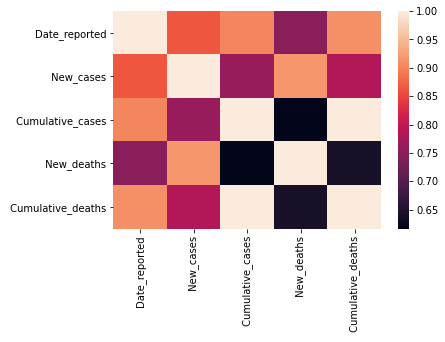

In [17]:
corr_0 = est.corr()

sns.heatmap(corr_0, xticklabels=est.columns, yticklabels=est.columns,)

In [18]:
new_cases = est.iloc[:, 1:2]
new_deaths = est.iloc[:, 3:4]

new_cases, new_deaths

(        New_cases
 37252           0
 37253           0
 37254           0
 37255           0
 37256           0
 ...           ...
 37525        5053
 37526        5099
 37527        4775
 37528        4863
 37529        3712
 
 [278 rows x 1 columns],         New_deaths
 37252            0
 37253            0
 37254            0
 37255            0
 37256            0
 ...            ...
 37525          483
 37526          432
 37527          414
 37528          388
 37529          208
 
 [278 rows x 1 columns])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support ' New_cases' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


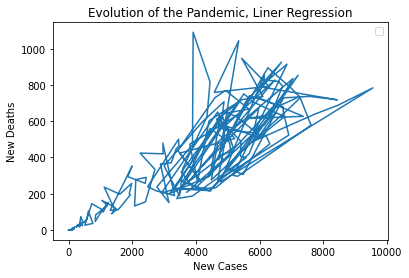

In [19]:
fig, ax = plt.subplots()
ax.plot(new_cases, new_deaths)
ax.set_xlabel('New Cases')
ax.set_ylabel('New Deaths')
ax.set_title('Evolution of the Pandemic, Liner Regression')
ax.legend(new_cases, new_deaths)

In [20]:
deaths_predictor = LinearRegression()

deaths_predictor.fit(new_cases,new_deaths)

deaths_predictor.score(new_cases,new_deaths)

0.8414320895627289

In [22]:
predict_set1 = np.arange(start=0, stop=10000, step=50)
predict_set1 = predict_set1.reshape(-1, 1)
base_1 = predict_set1

predict_set1 = pd.DataFrame(predict_set1, columns=['Cases'])

predict_set1

,Cases
0,0
1,50
2,100
3,150
4,200
...,...
195,9750
196,9800
197,9850
198,9900


In [23]:
deaths_prediction = deaths_predictor.predict(predict_set1)
base_2 = deaths_prediction

In [24]:
deaths_prediction = pd.DataFrame(deaths_prediction, columns=['New_Deaths'])

Text(0.5, 1.0, 'Evolution of the Pandemic, Liner Regression')

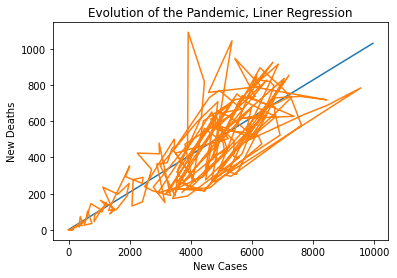

In [25]:
fig, ax = plt.subplots()
ax.plot(predict_set1, deaths_prediction)
ax.plot(new_cases, new_deaths)
ax.set_xlabel('New Cases')
ax.set_ylabel('New Deaths')
ax.set_title('Evolution of the Pandemic, Liner Regression')

In [26]:
deaths_prediction

,New_Deaths
0,1.223281
1,6.392741
2,11.562200
3,16.731660
4,21.901119
...,...
195,1009.267889
196,1014.437349
197,1019.606808
198,1024.776268


In [27]:
base_1 = np.mean(base_1)
base_2 = np.mean(base_2)

mortality_rate = base_2/base_1

mortality_rate

0.10363507623987575

In [28]:
x = df.iloc[:, 0:1]
y = df.iloc[:, 1:5]

In [29]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8174420964895075

In [30]:
df.to_csv('NewData.csv')

In [31]:
predict_set = np.arange(start=279, stop=365, step=1)
predict_set = predict_set.reshape(-1, 1)
predict_set

array([[279],
       [280],
       [281],
       [282],
       [283],
       [284],
       [285],
       [286],
       [287],
       [288],
       [289],
       [290],
       [291],
       [292],
       [293],
       [294],
       [295],
       [296],
       [297],
       [298],
       [299],
       [300],
       [301],
       [302],
       [303],
       [304],
       [305],
       [306],
       [307],
       [308],
       [309],
       [310],
       [311],
       [312],
       [313],
       [314],
       [315],
       [316],
       [317],
       [318],
       [319],
       [320],
       [321],
       [322],
       [323],
       [324],
       [325],
       [326],
       [327],
       [328],
       [329],
       [330],
       [331],
       [332],
       [333],
       [334],
       [335],
       [336],
       [337],
       [338],
       [339],
       [340],
       [341],
       [342],
       [343],
       [344],
       [345],
       [346],
       [347],
       [348],
       [349],
      

In [32]:
model_predicted = model.predict(predict_set)

In [33]:
predicted_set = pd.DataFrame(model_predicted, columns=['New_cases','Cumulative_cases','New_deaths','Cumulative_deaths'])

In [34]:
predicted_set

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,6652.391710,595907.259201,666.788770,64623.805963
1,6680.438947,598734.041106,669.529268,64929.089531
2,6708.486184,601560.823011,672.269767,65234.373100
3,6736.533421,604387.604916,675.010266,65539.656668
4,6764.580657,607214.386821,677.750764,65844.940236
...,...,...,...,...
81,8924.217901,824876.593505,888.769160,89351.774986
82,8952.265138,827703.375410,891.509659,89657.058554
83,8980.312375,830530.157315,894.250157,89962.342122
84,9008.359612,833356.939220,896.990656,90267.625691


In [35]:
x = x.to_numpy()

In [36]:
x
predict_set = pd.DataFrame(predict_set, columns=['Days'])

In [37]:
predict_set

,Days
0,279
1,280
2,281
3,282
4,283
...,...
81,360
82,361
83,362
84,363


In [38]:
predicted_set.to_csv('Predicted_data.csv')

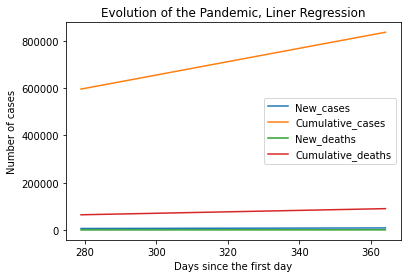

In [39]:
fig, main_ax = plt.subplots()
main_ax.plot(predict_set, predicted_set)
main_ax.set_xlabel('Days since the first day')
main_ax.set_ylabel('Number of cases')
main_ax.set_title('Evolution of the Pandemic, Liner Regression')
main_ax.legend(predicted_set)

In [40]:
datasetmexico = pd.read_csv('/content/drive/My Drive/datasetmexico.csv', encoding='latin1')

In [41]:
datasetmexico

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-10-12,071735,2,9,21,2,21,21,114,1,2020-03-18,2020-03-12,9999-99-99,97,2,75,1,97,2,2,1,2,2,2,2,2,1,2,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-10-12,1c4583,2,12,9,2,9,9,4,1,2020-03-30,2020-03-30,9999-99-99,97,2,23,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,99,MÃ©xico,97,97
2,2020-10-12,0d55c9,2,12,9,1,9,9,16,1,2020-03-26,2020-03-24,9999-99-99,97,2,28,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,99,MÃ©xico,97,97
3,2020-10-12,1468a5,1,4,5,1,15,5,18,1,2020-04-02,2020-03-27,9999-99-99,97,2,47,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,3,99,MÃ©xico,97,97
4,2020-10-12,043f64,2,4,9,2,9,9,10,2,2020-03-26,2020-03-26,2020-03-30,2,1,58,1,97,2,2,1,1,2,2,1,2,2,2,1,2,99,1,1,3,99,MÃ©xico,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093403,2020-10-12,450fe8,2,12,9,1,15,15,29,1,2020-10-07,2020-10-07,9999-99-99,97,2,45,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,3,6,99,MÃ©xico,97,97
2093404,2020-10-12,33397e,1,4,1,2,1,1,1,1,2020-10-09,2020-10-05,9999-99-99,97,2,24,1,97,2,2,2,2,2,2,2,2,2,1,2,1,2,2,97,6,99,MÃ©xico,97,97
2093405,2020-10-12,3d183f,2,12,9,1,9,9,7,1,2020-10-07,2020-10-07,9999-99-99,97,2,74,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,6,99,MÃ©xico,97,97
2093406,2020-10-12,25baca,2,4,15,1,15,15,63,1,2020-10-07,2020-10-07,9999-99-99,97,2,30,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,3,6,99,MÃ©xico,97,97


In [42]:
datasetmexico.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA', 'RESULTADO_LAB', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [43]:
datasetmexico = datasetmexico.drop(columns=['FECHA_ACTUALIZACION','ID_REGISTRO', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF'], axis=0)

In [44]:
datasetmexico

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,UCI
0,2,9,21,2,21,21,114,1,97,2,75,1,97,2,2,1,2,2,2,2,2,1,2,2,2,2,1,1,3,97
1,2,12,9,2,9,9,4,1,97,2,23,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,97
2,2,12,9,1,9,9,16,1,97,2,28,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,97
3,1,4,5,1,15,5,18,1,97,2,47,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,3,97
4,2,4,9,2,9,9,10,2,2,1,58,1,97,2,2,1,1,2,2,1,2,2,2,1,2,99,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093403,2,12,9,1,15,15,29,1,97,2,45,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,3,6,97
2093404,1,4,1,2,1,1,1,1,97,2,24,1,97,2,2,2,2,2,2,2,2,2,1,2,1,2,2,97,6,97
2093405,2,12,9,1,9,9,7,1,97,2,74,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,6,97
2093406,2,4,15,1,15,15,63,1,97,2,30,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,3,6,97


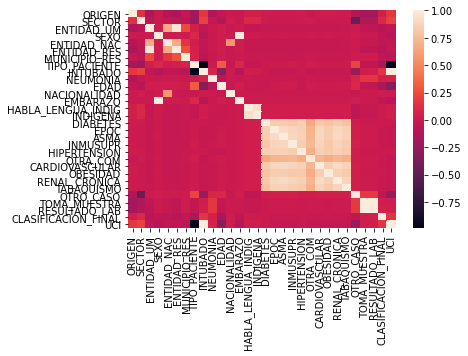

In [45]:
corr_1 = datasetmexico.corr()

sns.heatmap(corr_1, xticklabels=datasetmexico.columns, yticklabels=datasetmexico.columns,)

In [46]:
train_set = datasetmexico.iloc[:, 0:28]

In [47]:
train_set

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB
0,2,9,21,2,21,21,114,1,97,2,75,1,97,2,2,1,2,2,2,2,2,1,2,2,2,2,1,1
1,2,12,9,2,9,9,4,1,97,2,23,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1
2,2,12,9,1,9,9,16,1,97,2,28,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1
3,1,4,5,1,15,5,18,1,97,2,47,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1
4,2,4,9,2,9,9,10,2,2,1,58,1,97,2,2,1,1,2,2,1,2,2,2,1,2,99,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093403,2,12,9,1,15,15,29,1,97,2,45,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,3
2093404,1,4,1,2,1,1,1,1,97,2,24,1,97,2,2,2,2,2,2,2,2,2,1,2,1,2,2,97
2093405,2,12,9,1,9,9,7,1,97,2,74,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3
2093406,2,4,15,1,15,15,63,1,97,2,30,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,3


In [48]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled

array([[1.        , 0.08163265, 0.64516129, ..., 0.01020408, 0.        ,
        0.        ],
       [1.        , 0.1122449 , 0.25806452, ..., 0.01020408, 0.        ,
        0.        ],
       [1.        , 0.1122449 , 0.25806452, ..., 0.01020408, 0.        ,
        0.        ],
       ...,
       [1.        , 0.1122449 , 0.25806452, ..., 0.        , 0.        ,
        0.02083333],
       [1.        , 0.03061224, 0.4516129 , ..., 0.01020408, 0.        ,
        0.02083333],
       [1.        , 0.1122449 , 0.25806452, ..., 0.        , 0.        ,
        0.02083333]])

In [49]:
target_set = datasetmexico.iloc[:, 28:29]
target_set

,CLASIFICACION_FINAL
0,3
1,3
2,3
3,3
4,3
...,...
2093403,6
2093404,6
2093405,6
2093406,6


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_set_scaled, target_set, test_size = 0.2, random_state = 0)

In [51]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [56]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(28, input_dim=28, kernel_initializer='normal',activation='relu'))
model.add(Dense(21, kernel_initializer='normal',activation='relu'))
model.add(Dense(14, kernel_initializer='normal',activation='relu'))
model.add(Dense(7, kernel_initializer='normal',activation='relu'))
model.add(Dense(3, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])

In [57]:
model.fit(X_train, y_train, batch_size=40, epochs=7,validation_data=(X_test,y_test))

Epoch 1/7
41869/41869 [==============================] - 62s 1ms/step - loss: 1.6553 - mean_absolute_percentage_error: 23.6450 - val_loss: 0.4551 - val_mean_absolute_percentage_error: 9.2848
Epoch 2/7
41869/41869 [==============================] - 62s 1ms/step - loss: 0.3596 - mean_absolute_percentage_error: 7.8596 - val_loss: 0.3333 - val_mean_absolute_percentage_error: 7.4997
Epoch 3/7
41869/41869 [==============================] - 60s 1ms/step - loss: 0.2839 - mean_absolute_percentage_error: 6.3929 - val_loss: 0.3150 - val_mean_absolute_percentage_error: 6.9331
Epoch 4/7
41869/41869 [==============================] - 60s 1ms/step - loss: 0.2671 - mean_absolute_percentage_error: 5.9683 - val_loss: 0.2163 - val_mean_absolute_percentage_error: 4.7428
Epoch 5/7
41869/41869 [==============================] - 60s 1ms/step - loss: 0.2928 - mean_absolute_percentage_error: 6.1100 - val_loss: 0.2943 - val_mean_absolute_percentage_error: 6.7598
Epoch 6/7
41869/41869 [==========================

In [58]:
model.save('my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model/assets


In [59]:
!zip -r /content/model.zip /content/my_model/

  adding: content/my_model/ (stored 0%)
  adding: content/my_model/saved_model.pb (deflated 89%)
  adding: content/my_model/variables/ (stored 0%)
  adding: content/my_model/variables/variables.index (deflated 68%)
  adding: content/my_model/variables/variables.data-00000-of-00001 (deflated 30%)
  adding: content/my_model/assets/ (stored 0%)


In [61]:
predictions = model.predict(X_test)
predictions

array([[6.9777665],
       [3.0055661],
       [3.0184357],
       ...,
       [6.9806795],
       [7.0025387],
       [6.989678 ]], dtype=float32)

In [80]:
clasificacion = np.array([0])

In [81]:


for x in predictions:

  if x < 4.5:

    print('Etapa I (leve), infección temprana')

  elif x < 7.5:

    print('Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia')

  else:

    print('Etapa III (grave) de hiperinflamación sistémica')

  clasificacion = np.append(clasificacion, x)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa I (leve), infección temprana
Etapa I (leve), infección temprana
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa I (leve), infección temprana
Etapa I (leve), infección temprana
Etapa I (leve), infección temprana
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa II (participación pulmonar (IIa) sin hipoxia y (IIb) con hipoxia
Etapa I (leve), infección temprana
Etapa I (leve